            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
northeast / female   northeast / male  -0.2998 0.9998 -2.2706  1.6711  False
northeast / female northwest / female  -0.0464    1.0 -2.0142  1.9215  False
northeast / female   northwest / male  -0.2042    1.0 -2.1811  1.7728  False
northeast / female southeast / female   3.3469    0.0    1.41  5.2839   True
northeast / female   southeast / male   4.6657    0.0  2.7634   6.568   True
northeast / female southwest / female   0.7362 0.9497 -1.2377    2.71  False
northeast / female   southwest / male   1.8051 0.1007 -0.1657   3.776  False
  northeast / male northwest / female   0.2534 0.9999 -1.7083  2.2152  False
  northeast / male   northwest / male   0.0956    1.0 -1.8752  2.0665  False
  northeast / male southeast / female   3.6467    0.0  1.7159  5.5775   True

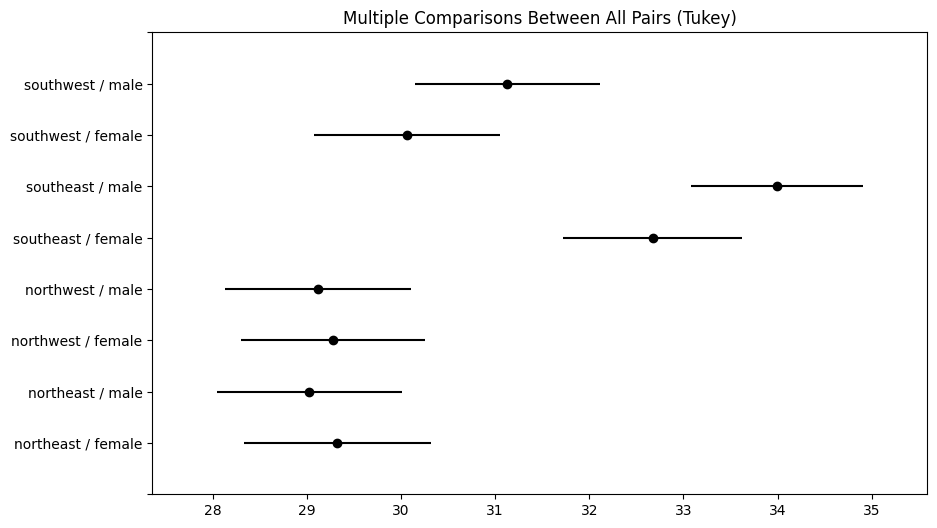

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def one(df):
    print(df.head(10))
    print("Regions: ", df['region'].unique())

def two(df):
    groups = df.groupby("region").groups
    bmi_data = df["bmi"]
    southwest = bmi_data[groups["southwest"]]
    southeast = bmi_data[groups["southeast"]]
    northwest = bmi_data[groups["northwest"]]
    northeast = bmi_data[groups["northeast"]]
    print(stats.f_oneway(southwest, southeast, northwest, northeast))

def three(df):
    bmi_frame = pd.DataFrame({"region":df["region"], "bmi":df["bmi"]})
    model = ols('bmi ~ region', data=bmi_frame).fit()
    anova_result = anova_lm(model, typ=2)
    print(anova_result)

def four(df):
    bmi_data = df["bmi"]
    groups = df.groupby("region").groups
    regions = ['southwest', 'southeast', 'northwest', 'northeast']
    region_pairs = []
    for r_one in range(3):
        for r_two in range(r_one + 1, 4):
            region_pairs.append((regions[r_one], regions[r_two]))
    for r_one, r_two in region_pairs:
        print(r_one,r_two)
        print(stats.ttest_ind(bmi_data[groups[r_one]], bmi_data[groups[r_two]]))

def five(df):
    region_data = df["region"]
    bmi_data = df["bmi"]
    tukey = pairwise_tukeyhsd(endog=bmi_data, groups=region_data, alpha=0.05)
    tukey.plot_simultaneous()
    plt.vlines(x=bmi_data.mean(), ymin=-0.5, ymax=4.5, color='red')
    print(tukey.summary())

def six(df):
    model = ols('bmi ~ region + sex + region:sex', data=df).fit()
    result = anova_lm(model, typ=2)
    print(result)

def seven(df):
    df['combined'] = df["region"] + " / " + df["sex"]
    bmi_data = df["bmi"]
    tukey = pairwise_tukeyhsd(endog=bmi_data, groups=df["combined"], alpha=0.05)
    tukey.plot_simultaneous()
    print(tukey.summary())

if __name__ == '__main__':
    dataframe = pd.read_csv('insurance.csv')
    one(dataframe)
    two(dataframe)
    three(dataframe)
    four(dataframe)
    six(dataframe)
    seven(dataframe)